<a href="https://colab.research.google.com/github/mannatpannu/Python-/blob/main/Assignmentt_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [3]:

# STEP 1: Sample Dataset

data = {
    'gender': ['female', 'male', 'female', 'male'],
    'race/ethnicity': ['group A', 'group B', 'group C', 'group D'],
    'parental level of education': ['bachelor\'s degree', 'some college', 'associate\'s degree', 'high school'],
    'lunch': ['standard', 'free/reduced', 'standard', 'free/reduced'],
    'test preparation course': ['completed', 'none', 'none', 'completed'],
    'reading score': [72, 60, 90, 65],
    'writing score': [74, 55, 88, 61],
    'math score': [70, 58, 85, 63]
}

df = pd.DataFrame(data)




In [4]:

# STEP 2: Preprocessing

df_encoded = pd.get_dummies(df, columns=[
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
], drop_first=True)

X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']



In [5]:

# STEP 3: Data Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



In [6]:

# STEP 4: Train Model

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [ ]:

# STEP 5: Evaluation

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 Model Evaluation on Test Set:")
print("R² Score:", round(r2, 3))
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))



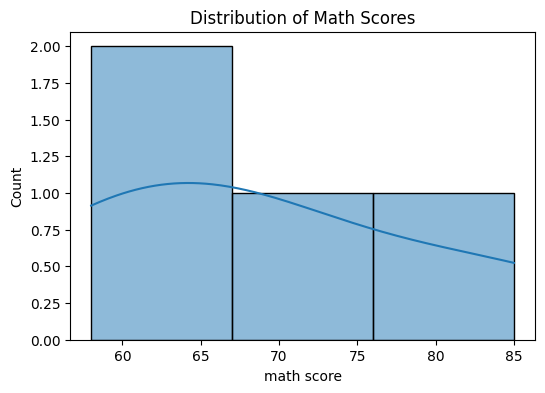

In [8]:

# STEP 6: Visualizations

plt.figure(figsize=(6, 4))
sns.histplot(df['math score'], kde=True)
plt.title("Distribution of Math Scores")
plt.show()


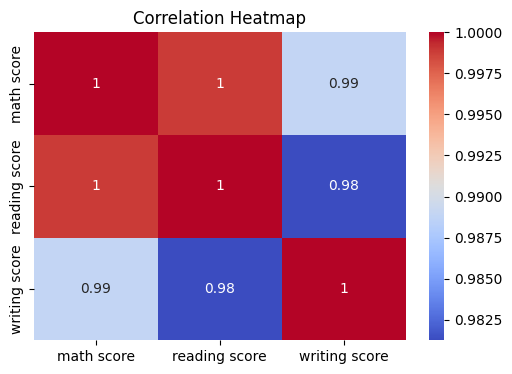

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

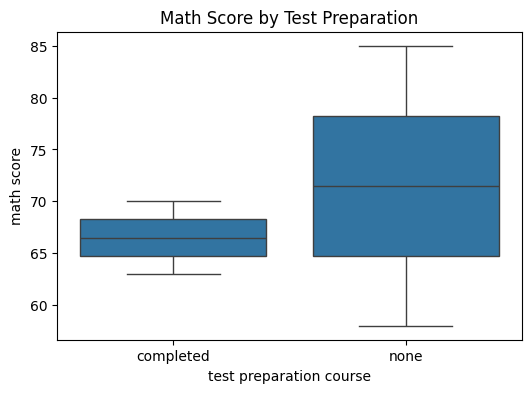

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Score by Test Preparation")
plt.show()

In [11]:

# STEP 7: Gender-Specific Models

for gender in ['female', 'male']:
    df_gender = df[df['gender'] == gender]
    df_gender_encoded = pd.get_dummies(df_gender, columns=[
        'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'
    ], drop_first=True)

    Xg = df_gender_encoded.drop('math score', axis=1)
    yg = df_gender_encoded['math score']

    if len(Xg) < 2:
        print(f"\n⚠️ Not enough data to train a model for {gender}.")
        continue

    Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size=0.5, random_state=42)
    model_g = LinearRegression()
    model_g.fit(Xg_train, yg_train)
    yg_pred = model_g.predict(Xg_test)

    print(f"\n👤 {gender.capitalize()} Model Evaluation")
    print("R² Score:", round(r2_score(yg_test, yg_pred), 3))
    print("MAE:", round(mean_absolute_error(yg_test, yg_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(yg_test, yg_pred)), 2))


👤 Female Model Evaluation
R² Score: nan
MAE: 15.0
RMSE: 15.0

👤 Male Model Evaluation
R² Score: nan
MAE: 5.0
RMSE: 5.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
